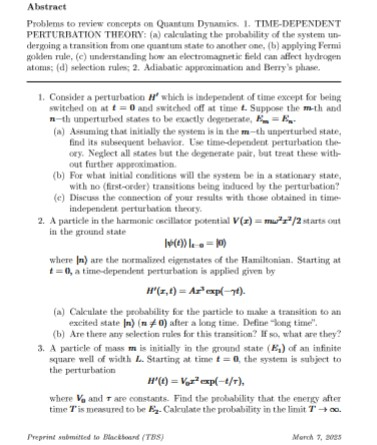

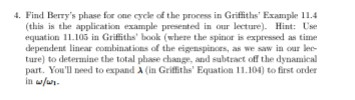

In [2]:
from IPython.display import Image
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.collections import LineCollection
#from scipy.special import hermite, factorial, eval_hermite
import os
import glob
import shutil
import matplotlib.style as style
import pandas as pd


style.use('dark_background')
plt.rcParams['text.usetex'] = False



#display screenshots
for i in range(1, 3):
    display(Image(filename=f'p_statement/p{i}.jpg'))

#file moving for housekeeping
def move_plots():
    output_dir = 'graphs'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    #all gif and png
    files_to_move = glob.glob('*.png') + glob.glob('*.gif')

    for file in files_to_move:
        destination = os.path.join(output_dir, file)

        #if exists, replace
        if os.path.exists(destination):
            os.remove(destination)

        #move it
        shutil.move(file, destination)
        print(f'Moved {file} to {output_dir}')